### <font color="brown">Problem Set 10: Pandas - Solution</font>

In [1]:
import numpy as np
import pandas as pd
from pandas import Series
from pandas import DataFrame

---

#### Problem 1:

Perform the following actions on the DataFrame <tt>df</tt> that follows:

1. Count the number of missing (NaN) values in each column of df. Which column has the maximum number of missing values?

2. Replace the missing values in Min.Price with the column’s mean and those in Max.Price with the column’s median. 

3. You need to add a column 'Affordable' in the dataframe which has "Yes" or "No" values.<br>
For each row, the column value is determined as follows: 
- If Price is greater than 35, it is not affordable.
- If Price if less than equal to 35, check the horsepower and fuel tank capacity. For affordable, horsepower has to be greater than 150 and fuel tank has to be greater 14. 
- Finally you need the Passengers to be greater than equal to 4. 

Once the column is added, filter out the affordable (Yes) rows, and display the data sorted by price (High to Low).

4. Find the average city MPG of cars for each manufacturer

In [21]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,None,Front,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,...,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,NaN,30.0,NaN,22.0,30.0,NaN,Rear,...,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i


#### Solution

In [3]:
# 1. Count missing values

nans_each_col = df.apply(lambda x: x.isnull().sum())
print(nans_each_col)
nans_each_col.index.tolist()[nans_each_col.argmax()]

Manufacturer           4
Model                  1
Type                   3
Min.Price              7
Price                  2
Max.Price              5
MPG.city               9
MPG.highway            2
AirBags                6
DriveTrain             7
Cylinders              5
EngineSize             2
Horsepower             7
RPM                    3
Rev.per.mile           6
Man.trans.avail        5
Fuel.tank.capacity     8
Passengers             2
Length                 4
Wheelbase              1
Width                  6
Turn.circle            5
Rear.seat.room         4
Luggage.room          19
Weight                 7
Origin                 5
Make                   3
dtype: int64


'Luggage.room'

In [4]:
# 2. Replace NaNs in Min.Price and Max.Price

df['Min.Price'] = df['Min.Price'].fillna(df['Min.Price'].mean())
df['Max.Price'] = df['Max.Price'].fillna(df['Max.Price'].median())

In [5]:
# 3. Add column 'Affordable'

newcol = []
for id, row in df.iterrows():
    if row['Price'] > 35 or row['Passengers'] < 4:
        newcol.append('No')
    elif row['Horsepower'] < 150 or row['Fuel.tank.capacity'] < 14:
        newcol.append('No')
    else:
        newcol.append('Yes')

df['Affordable'] = np.array(newcol)
df[df['Affordable'] == 'Yes'].sort_values(by='Price', ascending=False).head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make,Affordable
9,Cadillac,DeVille,Large,33.000000,34.7,36.30,16.0,25.0,Driver only,Front,...,206.0,114.0,73.0,43.0,35.0,18.0,3620.0,USA,Cadillac DeVille,Yes
50,Lincoln,Continental,Midsize,33.300000,34.3,35.30,17.0,26.0,Driver & Passenger,NaN,...,205.0,109.0,73.0,42.0,30.0,19.0,3695.0,USA,Lincoln Continental,Yes
1,NaN,Legend,Midsize,29.200000,33.9,38.70,18.0,25.0,Driver & Passenger,Front,...,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend,Yes
4,BMW,535i,Midsize,17.118605,30.0,19.15,22.0,30.0,NaN,Rear,...,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i,Yes
2,Audi,90,Compact,25.900000,29.1,32.30,20.0,26.0,Driver only,Front,...,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90,Yes


In [6]:
# 4. Average city MPG of cars by manufacturer
df.groupby('Manufacturer').mean()['MPG.city']

Manufacturer
Acura            25.000000
Audi             19.500000
BMW              22.000000
Buick            19.000000
Cadillac         16.000000
Chevrolet        19.428571
Chrysler         21.500000
Dodge            22.400000
Eagle            24.500000
Ford             21.714286
Geo              38.000000
Honda            30.000000
Hyundai          25.000000
Infiniti         17.000000
Lexus            18.000000
Lincoln          17.500000
Mazda            23.600000
Mercedes-Benz    19.000000
Mercury          21.000000
Mitsubishi       23.500000
Nissan           22.750000
Oldsmobile       21.666667
Plymouth               NaN
Pontiac          22.000000
Saab             20.000000
Saturn                 NaN
Subaru           27.000000
Suzuki           39.000000
Toyota           24.250000
Volkswagen       20.250000
Volvo            21.000000
Name: MPG.city, dtype: float64

---

#### Problem 2

##### In this problem, you will explore a Pima Indians diabetes dataset, pimaIndiansDiabetes.csv

In [7]:
diabetes = pd.read_csv("pimaIndiansDiabetes.csv")
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,NaN,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48,180,32.9,0.171,63,0
764,2,122,70.0,27,0,36.8,0.340,27,0
765,5,121,72.0,23,112,26.2,0.245,30,0
766,1,126,60.0,0,0,30.1,0.349,47,1


1. Place the BMI column values into one of 4 groups labeled 0, 1, 2 and 3, by splitting at 18.5, 25 and 30 respectively. (If value <= 18.5 then group 0, if 18.5 < value <= 25 then group 1, etc.)
Make sure that these values are of 'int' type.
2. Put the Age column values into one of 3 groups labeled 0, 1, and 2, by splitting at the 40th and 90th percentile values respectively.
<b>You can1 use the [np.percentile](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html) function.</b>
3. Identify and remove outliers in the columns Glucose, SkinThickness, and Insulin.<br>
For this, in every column, discard the rows where the values are more than Q<sub>3</sub> + k(IQR) or less than Q<sub>1</sub> - k(IQR).<br>
Here, Q<sub>1</sub> is the 25th percentile value, Q<sub>3</sub> is the 75th percentile value and IQR (or Inter-Quartile Range) is Q<sub>3</sub> - Q<sub>1</sub>.<br>
'k' is an adjustable value. You can use k = 1.5 for this task. Click [here](https://www.purplemath.com/modules/boxwhisk3.htm) to read more on this.
4. Perform Min-Max scaling for the Insulin column. Read more on Min-Max scaling [here](https://sebastianraschka.com/Articles/2014_about_feature_scaling.html#about-min-max-scaling).
5. Fill in the missing BloodPressure values with the average BloodPressure of the age group to which the person belongs to.

#### Solution

In [9]:
# 1. Classify BMI column into groups 

def makeBMICat(x):
    if x <= 18.5:
        return 0
    if x <= 25:
        return 1
    if x <= 30:
        return 2
    return 3
diabetes['BMI'] = diabetes['BMI'].apply(makeBMICat)

In [10]:
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,3,0.627,50,1
1,1,85,66.0,29,0,2,0.351,31,0
2,8,183,NaN,0,0,1,0.672,32,1
3,1,89,66.0,23,94,2,0.167,21,0
4,0,137,40.0,35,168,3,2.288,33,1
5,5,116,74.0,0,0,2,0.201,30,0
6,3,78,NaN,32,88,3,0.248,26,1
7,10,115,0.0,0,0,3,0.134,29,0
8,2,197,70.0,45,543,3,0.158,53,1
9,8,125,96.0,0,0,0,0.232,54,1


In [11]:
# 2. Classify Age column into groups

perc40 = np.percentile(diabetes['Age'],40)
perc90 = np.percentile(diabetes['Age'],90)
def makeAgeCat(x):
    if x <= perc40:
        return 0
    if x > perc90:
        return 2
    return 1
diabetes['Age'] = diabetes['Age'].apply(makeAgeCat)
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,3,0.627,1,1
1,1,85,66.0,29,0,2,0.351,1,0
2,8,183,NaN,0,0,1,0.672,1,1
3,1,89,66.0,23,94,2,0.167,0,0
4,0,137,40.0,35,168,3,2.288,1,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48,180,3,0.171,2,0
764,2,122,70.0,27,0,3,0.340,0,0
765,5,121,72.0,23,112,2,0.245,1,0
766,1,126,60.0,0,0,3,0.349,1,1


In [12]:
# 3. Remove outliers in the columns Glucose, SkinThickness, and Insulin

def removeOutliers(column):
    Q1 = np.percentile(diabetes[column], 25)
    Q3 = np.percentile(diabetes[column], 75)
    IQR = Q3 - Q1
    return Q1,Q3,IQR

In [13]:
Q1, Q3, IQR = removeOutliers('Glucose')
diabetes = diabetes[(diabetes['Glucose'] >= Q1-11.5*IQR) & (diabetes['Glucose'] <= Q3+1.5*IQR)]

In [14]:
Q1, Q3, IQR = removeOutliers('SkinThickness')
diabetes = diabetes[(diabetes['SkinThickness'] >= Q1-11.5*IQR) & (diabetes['SkinThickness'] <= Q3+1.5*IQR)]

In [15]:
Q1, Q3, IQR = removeOutliers('Insulin')
diabetes = diabetes[(diabetes['Insulin'] >= Q1-11.5*IQR) & (diabetes['Insulin'] <= Q3+1.5*IQR)]

In [16]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,3,0.627,1,1
1,1,85,66.0,29,0,2,0.351,1,0
2,8,183,NaN,0,0,1,0.672,1,1
3,1,89,66.0,23,94,2,0.167,0,0
4,0,137,40.0,35,168,3,2.288,1,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48,180,3,0.171,2,0
764,2,122,70.0,27,0,3,0.340,0,0
765,5,121,72.0,23,112,2,0.245,1,0
766,1,126,60.0,0,0,3,0.349,1,1


In [17]:
# 4. Perform Min-Max scaling for the Insulin column

diabetes["Insulin"] = (diabetes["Insulin"] - min(diabetes["Insulin"]))/(max(diabetes["Insulin"]) - min(diabetes["Insulin"]))

In [18]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0.000000,3,0.627,1,1
1,1,85,66.0,29,0.000000,2,0.351,1,0
2,8,183,NaN,0,0.000000,1,0.672,1,1
3,1,89,66.0,23,0.295597,2,0.167,0,0
4,0,137,40.0,35,0.528302,3,2.288,1,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48,0.566038,3,0.171,2,0
764,2,122,70.0,27,0.000000,3,0.340,0,0
765,5,121,72.0,23,0.352201,2,0.245,1,0
766,1,126,60.0,0,0.000000,3,0.349,1,1


In [19]:
# 5. Fill in the missing BloodPressure value

ageDict = {}
bps_notnull = diabetes[diabetes["BloodPressure"].notnull()]

age0 = bps_notnull[bps_notnull["Age"] == 0]
ageDict[0] = sum(age0["BloodPressure"])/age0.shape[0]
age1 = bps_notnull[bps_notnull["Age"] == 1]
ageDict[1] = sum(age1["BloodPressure"])/age1.shape[0]
age2 = bps_notnull[bps_notnull["Age"] == 2]
ageDict[2] = sum(age2["BloodPressure"])/age2.shape[0]

diabetes['BloodPressure'] = diabetes['BloodPressure'].fillna(diabetes['Age'].apply(lambda x: ageDict[x]))

In [20]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.000000,35,0.000000,3,0.627,1,1
1,1,85,66.000000,29,0.000000,2,0.351,1,0
2,8,183,71.232283,0,0.000000,1,0.672,1,1
3,1,89,66.000000,23,0.295597,2,0.167,0,0
4,0,137,40.000000,35,0.528302,3,2.288,1,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.000000,48,0.566038,3,0.171,2,0
764,2,122,70.000000,27,0.000000,3,0.340,0,0
765,5,121,72.000000,23,0.352201,2,0.245,1,0
766,1,126,60.000000,0,0.000000,3,0.349,1,1


---

#### Problem 3

Plot the functions f(x) = e^(−x/10)*sin(πx) and g(x) = x*e^(−x/3) over the interval [0, 10]. Include labels for the x- and y-axes, and a legend explaining which line is which plot. Save the plot in png format.

#### Solution

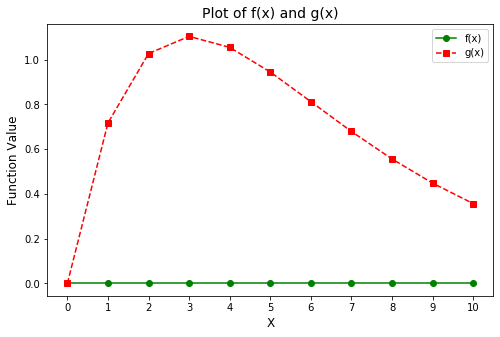

In [22]:
from matplotlib import pyplot as plt
import math

# Initialize data
f_x = [(math.exp(-x/10))*math.sin(math.pi*x) for x in range(0,11)]
g_x = [x*math.exp(-x/3) for x in range(0,11)]
x = [i for i in range(0,11)]


# Plot
plt.figure(figsize=(8,5))  # figure size 
plt.xticks(x)
plt.xlabel('X',fontsize=12)
plt.ylabel('Function Value',fontsize=12)
plt.title('Plot of f(x) and g(x)',fontsize=14)
plt.plot(x, f_x, 'g-', marker='o', label='f(x)')
plt.plot(x,g_x,'r--',marker='s',label='g(x)')
plt.legend(loc='best')
# Save figure as png
plt.savefig('testplot.png')